# I. Rigideces de Entrepiso - Fórmulas de Wilbur-Biggs

## 1. Librerías

In [1]:
import numpy as np

from matplotlib import pyplot as plt

## 2. Geometría de Pórtico

### 2.1 Número de Pisos

In [2]:
n_pisos = int(input('* Ingrese el número de pisos: '))

print(f'* El pórtico tiene {n_pisos} plantas.')


* El pórtico tiene 3 plantas.


### 2.2 Elevaciones de Entrepisos

In [3]:
h = np.zeros(n_pisos)
    
for i in range(n_pisos):
    h[i] = float(input(f'* Elevación del entrepiso {i + 1} (cm): '))

for i in range(n_pisos):
    print(f'\n* Elevación H-{n_pisos - i}: {h[n_pisos - i - 1]} m')


* Elevación H-3: 200.0 m

* Elevación H-2: 200.0 m

* Elevación H-1: 200.0 m


### 2.3 Columnas y Vigas

In [4]:
# Número de columnas
n_col = int(input('* Indique el número de columnas: '))

# Número de vigas por piso
n_vigas = n_col - 1

print(f'* El pórtico es de {n_col} columnas y ', end = '')

if n_vigas > 1:
    print(f'{n_vigas} vigas por piso.')
else:
    print(f'{n_vigas} viga por piso.')


* El pórtico es de 2 columnas y 1 viga por piso.


### 2.4 Tipo de Apoyo en la Base

In [5]:
while True:
    t_apoyo = input('* Tipo de apoyo ([E]mpotrado o [A]rticulado): ')
        
    if t_apoyo.upper() == 'E':
        print('* El pórtico es empotrado en su base.')
        apoyo_articulado = False
        break
    elif t_apoyo.upper() == 'A':
        print('* El pórtico es articulado en su base.')
        apoyo_articulado = True
        break
    else:
        print('! Ingrese un tipo de apoyo válido.')


* El pórtico es empotrado en su base.


### 2.5 Modelo Matemático

In [6]:
plt.rcParams['figure.figsize'] = 6, 8
plt.rcParams['font.family'] = 'Cascadia Mono'
plt.style.use('grayscale')

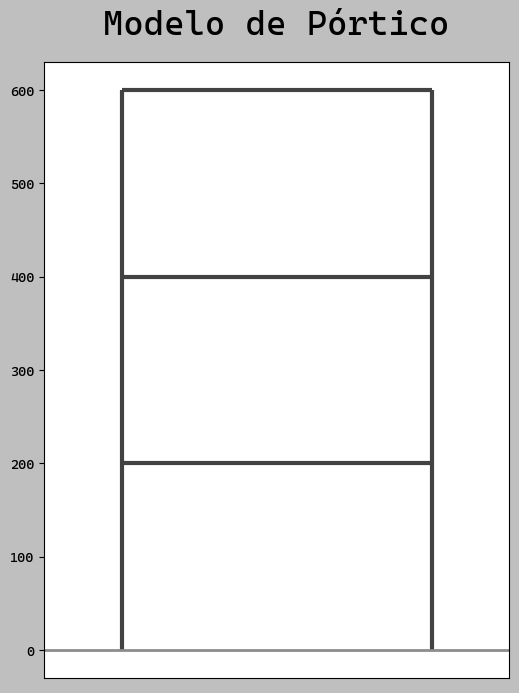

In [7]:
ax = plt.axes()
ax.set_title('Modelo de Pórtico', fontsize = '25', pad = 20)

ax.grid(False)
ax.axes.xaxis.set_visible(False)

# Trazado de vigas
H = 0
B = 2 * sum(h) / 3

for i in range(n_pisos):
    H += h[i]
    plt.hlines(H, 0, B, linewidth = 3, color = '#424242')

# Trazado de columnas
d = 0

for i in range(n_col):
    plt.vlines(d, 0, H,  linewidth = 3, color = '#424242')
    d += B / (n_col - 1)

# Ubicación de apoyos
if apoyo_articulado:
    d = 0
    for i in range(n_col):
        plt.plot(d, 0, marker = 10, markersize = 16, color = '#424242')
        d += B / (n_col - 1)

ax.axhline(y = 0, linewidth = 2, color = '#8C8C8C')

ax.set_xlim(-B / 4, 5 * B / 4)

plt.show()


## 3. Cálculo de Rigideces

* La rigidez de cada entrepiso es función de las _rigideces relativas_ de sus elementos.

### 3.1 Modulo de Elasticidad

In [8]:
E = float(input('* Modulo de elasticidad (kg/cm2): '))
print(f'* Módulo de elasticidad [E]: {E}')


* Módulo de elasticidad [E]: 2000000.0


### 3.2 Fórmulas de Wilbur-Biggs

In [9]:
## Fórmulas de primer piso

# Apoyos articulados
def Kp1_articulado(Kc1, Kv1, h1, h2, E):
    K = 24 * E
    K /= h1
    K /= 8 * h1 / Kc1 + (2 * h1 + h2) / Kv1
    return K

# Apoyos empotrados
def Kp1_empotrado(Kc1, Kv1, h1, E):
    K = 24 * E
    K /= np.power(h1, 2)
    K /= 2 / Kc1 + 1 / (Kv1 + Kc1 / 12)
    return K

* Fórmula de primer piso para apoyos articulados:  

<br />

$$
K_i = \frac{24 \ E}{H_i \left[\displaystyle  \frac{8H_i}{\sum k_{c_i}} + \frac{2H_i + H_{i+1}}{\sum k_{v_i}}\right]}
$$

<br />

* Fórmula de primer piso para apoyos empotrados:

<br />

$$
K_i = \frac{24 \ E}{H_i^2 \left[\displaystyle \frac{2}{\sum k_{c_i}}+ \displaystyle \frac{1}{\sum k_{v_i} + \displaystyle  \frac{\sum k_{c_i}}{12}}\right]}
$$


In [10]:
# Fórmula de segundo piso con
# un primer piso articulado

def Kp2_articulado(Kc1, Kv0, Kv1, h0, h1, h2, E):
    K = 48 * E
    K /= h1
    K /= (4 * h1 / Kc1) + ((h1 + h2) / Kv1) + ((2 * h0 + h1) / Kv0)
    return K

* Fórmula para el segundo piso con apoyos articulados:

$$
K_i = \frac{48 \ E}{H_i \left[\displaystyle  \frac{4H_i}{\sum k_{c_i}} + \frac{H_i + H_{i+1}}{\sum k_{v_i}} + \frac{2 H_{i-1} + H_{i}}{\sum k_{v_{i-1}}}\right]}
$$



In [11]:
# Fórmula general de entrepiso

def Kp_entrepiso(Kc1, Kv0, Kv1, h0, h1, h2, E):
    K = 48 * E
    K /= h1
    K /= (4 * h1 / Kc1) + ((h0 + h1) / Kv0) + ((h1 + h2) / Kv1)
    return K


* Fórmula general de entrepiso

$$
K_i = \frac{48 \ E}{H_i \left[\displaystyle  \frac{4H_i}{\sum k_{c_i}} + \frac{H_{i-1} + H_{i}}{\sum k_{v_{i-1}}} + \frac{ H_{i} + H_{i+1}}{\sum k_{v_{i}}}\right]}
$$

### 3.2 Rigideces Relativas de Columnas

In [12]:
Kc = np.empty((n_pisos, n_col))

for i in range(n_pisos):
    print(f'- Piso {i + 1}')
    for j in range(n_col):
        Kc[i, j] = float(input(f'* Piso {i + 1} - Columna {j + 1} [Kc]: '))
        print(f'\t* Kc-Columna {j + 1} (cm3): {Kc[i, j]}')

        if j == n_col - 1:
            print(f'\t\t> Kc[Piso{i + 1}] = {sum(Kc[i,:])} cm3\n')


- Piso 1
	* Kc-Columna 1 (cm3): 3.0
	* Kc-Columna 2 (cm3): 4.0
		> Kc[Piso1] = 7.0 cm3

- Piso 2
	* Kc-Columna 1 (cm3): 5.0
	* Kc-Columna 2 (cm3): 6.0
		> Kc[Piso2] = 11.0 cm3

- Piso 3
	* Kc-Columna 1 (cm3): 7.0
	* Kc-Columna 2 (cm3): 8.0
		> Kc[Piso3] = 15.0 cm3



### 3.3 Rigideces Relativas de Vigas

In [13]:
Kv = np.empty((n_pisos, n_vigas))

for i in range(n_pisos):
    print(f'- Piso {i + 1}')
    for j in range(n_vigas):
        Kv[i, j] = float(input(f'* Piso {i + 1} - Viga {j + 1} [Kv]: '))
        print(f'\t* Viga {j + 1} (Kv): {Kv[i, j]}')

        if j == n_vigas - 1:
            print(f'\t\t> Kv[Piso{i + 1}] = {sum(Kv[i,:])}\n')


- Piso 1
	* Viga 1 (Kv): 1.0
		> Kv[Piso1] = 1.0

- Piso 2
	* Viga 1 (Kv): 5.0
		> Kv[Piso2] = 5.0

- Piso 3
	* Viga 1 (Kv): 4.0
		> Kv[Piso3] = 4.0



### 3.4 Rigideces de Entrepisos

In [14]:
K = []

for i in range(n_pisos):
    ### Rigideces de elementos ###

    ## Columnas ##

    # Piso actual
    Kc1 = sum(Kc[i,:])

    # Piso superior
    try: 
        Kc2 = sum(Kc[i + 1,:])
    except IndexError:
        Kc2 = 0

    # Piso inferior
    try: 
        Kc0 = sum(Kc[i - 1,:])
    except IndexError:
        Kc0 = 0

    ## Vigas ##

    # Piso actual
    Kv1 = sum(Kv[i,:])

    # Piso superior
    try: 
        Kv2 = sum(Kv[i + 1,:])
    except IndexError:
        Kv2 = 0

    # Piso inferior
    try: 
        Kv0 = sum(Kv[i - 1,:])
    except IndexError:
        Kv0 = 0


    ### Elevaciones ###
    
    # Piso actual
    h1 = h[i]

    # Piso superior
    try:
        h2 = h[i + 1]
    except IndexError:
        h2 = 0

    # Piso inferior
    try:
        h0 = h[i - 1]
    except IndexError:
        h0 = 0


    ### Cálculos ###

    if i == 0: # Primer piso
        if apoyo_articulado:
            K.append(Kp1_articulado(Kc1, Kv1, h1, h2, E))
        else:
            K.append(Kp1_empotrado(Kc1, Kv1, h1, E))

    elif i == 1: # Segundo piso
        if apoyo_articulado:
            K.append(Kp2_articulado(Kc1, Kv0, Kv1, h0, h1, h2, E))
        else:
            K.append(Kp_entrepiso(Kc1, Kv0, Kv1, h0, h1, h2, E))
    
    else:
        K.append(Kp_entrepiso(Kc1, Kv0, Kv1, h0, h1, h2, E))

    print(f'* Entrepiso {i + 1}')
    print(f'\t> K[{i + 1}] = {K[i]}\n')


* Entrepiso 1
	> K[1] = 1308.1967213114756

* Entrepiso 2
	> K[2] = 868.421052631579

* Entrepiso 3
	> K[3] = 2618.181818181818



## 4. Dependencias

In [32]:
%load_ext watermark

# Compilador y librerías
%watermark -v
%watermark -iv

# Sistema operativo
%watermark -m

# Fecha de subida
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.5
IPython version      : 7.24.1

sys       : 3.9.5 (default, May 18 2021, 14:42:02) [MSC v.1916 64 bit (AMD64)]
matplotlib: 3.3.4
numpy     : 1.20.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 3, GenuineIntel
CPU cores   : 12
Architecture: 64bit

Last updated: Sun Jun 20 2021 00:31:12SA Pacific Standard Time

